In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from branca.element import Figure

In [2]:
ds = pd.read_csv("California_Fire_Incidents.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [3]:
firedep_ds = pd.read_excel("CalFireDepartments.xlsx")

firedep_ds.head()

,Department Name,Latitude,Longitude
0,Butte County Unit,39.644268,-121.800067
1,San Mateo-Santa Cruz Unit,37.512188,-122.338668
2,Fresno Kings Unit,36.676022,-119.616011
3,Lassen-Modoc Unit,40.424895,-120.677065
4,San Diego Unit,32.749183,-116.926775


In [4]:
cols=["Location", "SearchDescription", "SearchKeywords", 
"CanonicalUrl", "Final", "Featured", "FuelType", "Updated", 
"StructuresEvacuated", "Active", "ConditionStatement", 
"ControlStatement", "Public", "PercentContained", "Status"]
ds_copy = ds.copy()

ds_copy = ds_copy.drop(cols, axis = 1)
ds_copy["Extinguished"] = pd.to_datetime(ds_copy["Extinguished"])
ds_copy["Started"] = pd.to_datetime(ds_copy["Started"])
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [5]:
# Segmentating data and adding aditional information.

# Add the time of the fire duration.
ds_copy["FireDuration"] = -(ds_copy["Started"]-ds_copy["Extinguished"])

#Segmentating the data based on how big (how many acres burned) the wild fire is.
meanAcresBurned = ds_copy["AcresBurned"].mean()
ds_copy.loc[ds_copy["AcresBurned"]>meanAcresBurned+10000, "WildfireSize"] = "BigWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned+10000, "WildfireSize"] = "AvgWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned-2000, "WildfireSize"] = "SmallWildfire"
ds_copy.head()

,AcresBurned,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,Engines,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,UniqueId,WaterTenders,FireDuration,WildfireSize
0,257314.0,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,Tuolumne,55,NaN,NaN,NaN,...,Rim Fire,NaN,2013-08-17 15:25:00+00:00,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN,20 days 03:05:00,BigWildfire
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,Los Angeles,19,NaN,NaN,NaN,...,Powerhouse Fire,NaN,2013-05-30 15:28:00+00:00,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN,9 days 03:02:00,BigWildfire
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,Riverside,33,NaN,NaN,NaN,...,Mountain Fire,NaN,2013-07-15 13:43:00+00:00,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN,15 days 04:17:00,BigWildfire
3,27440.0,Tahoe National Forest,NaN,2013,False,Placer,31,NaN,NaN,NaN,...,American Fire,NaN,2013-08-10 16:30:00+00:00,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN,19 days 15:30:00,BigWildfire
4,24251.0,Ventura County Fire/CAL FIRE,NaN,2013,True,Ventura,56,47.0,8.0,117.0,...,Springs Fire,2167.0,2013-05-02 07:01:00+00:00,6.0,10.0,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0,8 days 23:29:00,BigWildfire


In [6]:
# Add additional column with bool value where the av fire duration is lower than the mean of dataset without outliers.
lowerOutlier = ds_copy["FireDuration"].quantile(0.05) # Remove lower outliers
upperOutlier = ds_copy["FireDuration"].quantile(0.7) # Remove upper outliers
ds_copy1 = ds_copy[(ds_copy["FireDuration"]>lowerOutlier) & (ds_copy["FireDuration"]<upperOutlier)] # New dataset for mean without outliers
meanFireDuration = ds_copy1["FireDuration"].mean() # Mean of new dataset

ds_copy.loc[ds_copy["FireDuration"]>meanFireDuration, "Fast Extinguishing"] = False
ds_copy.loc[ds_copy["FireDuration"]<=meanFireDuration, "Fast Extinguishing"] = True

# map values 0 to false and 1 to true
ds_copy["Fast Extinguishing"] = ds_copy["Fast Extinguishing"].astype("bool")
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [7]:
# Drop rows where the longitude and latitude is outside California
# California Latitude: 32 to 42
# California Longitude: -114 to -124
ds_copy = ds_copy[ds_copy.Latitude>32]
ds_copy = ds_copy[ds_copy.Latitude<42]
ds_copy = ds_copy[ds_copy.Longitude<-114]
ds_copy = ds_copy[ds_copy.Longitude>-124]

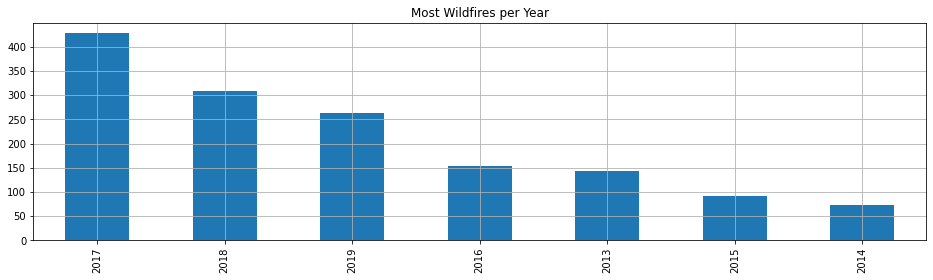

In [8]:
# Plot the all the cases from specific years
plt.figure(figsize=(16,4))
ds_copy.ArchiveYear.value_counts().plot(kind='bar')
plt.title('Most Wildfires per Year')
plt.grid()
plt.show()

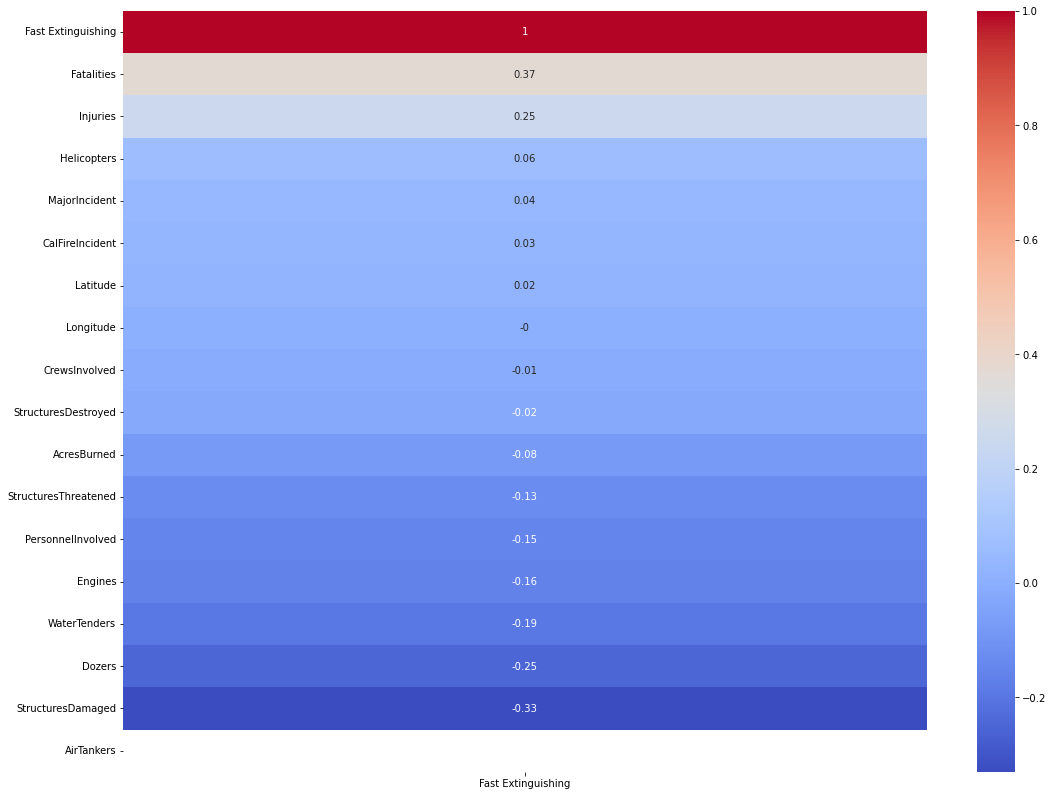

In [15]:
# Correlation between columns and "Fast Extinguishing"
corr_ds = ds_copy.drop(["UniqueId", "Counties", "CountyIds", "Extinguished", "Started", "Name", "FireDuration", "AdminUnit", "WildfireSize", "ArchiveYear"], axis=1)
x = round(corr_ds.corr(),2)
plt.figure(figsize=(18,14))
sb.heatmap(x[["Fast Extinguishing"]].sort_values(by=["Fast Extinguishing"], ascending=False), cmap='coolwarm', annot=True)
plt.show()

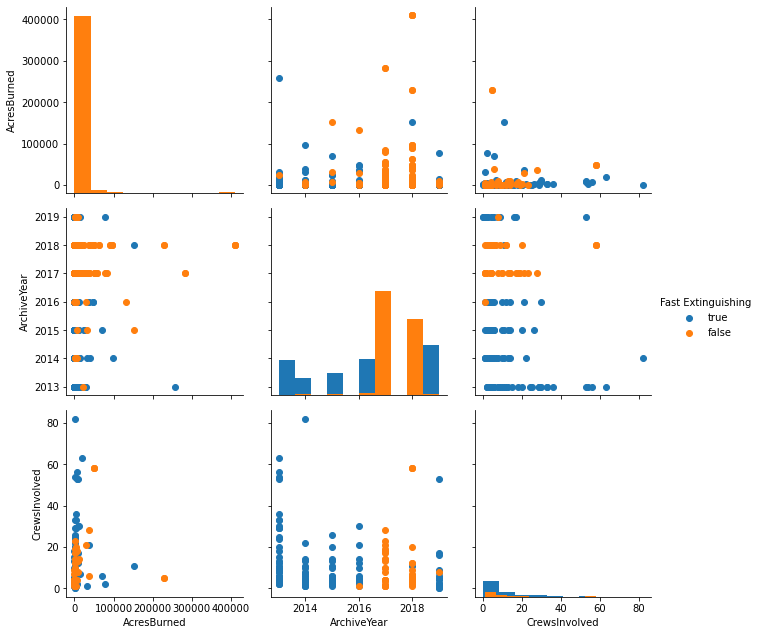

In [ ]:
# Pair plot columns from the dataset and show for which wildfire size they are from
pairplot = sb.PairGrid(data=ds_copy, vars = ["AcresBurned", "ArchiveYear", "CrewsInvolved"], hue="Fast Extinguishing", height=3)
pairplot.map_diag(plt.hist)
pairplot.map_offdiag(plt.scatter)
pairplot.add_legend()

In [ ]:
# Create a folium map and place a circle in the map for each of the wildfires from 2013-2020 with a larger radius depending on how big the wildfire was 
# ; uncomment the layercontrol line if you want other maptypes
fig=Figure(width=550,height=350)

map = folium.Map(width=550,height=350,location=[36.778259, -119.417931], zoom_start=5)
fig.add_child(map)
folium.TileLayer('Stamen Terrain').add_to(map)
#folium.LayerControl().add_to(map)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])*20
  folium.Circle(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(map)
map

In [ ]:
# Create a folium map for each of the wildfires under the category of "BigWildfire"; uncomment the layercontrol line if you want other maptypes
fig2=Figure(width=550,height=350)

bigFireMap = folium.Map(width=550,height=350,location=[36.778259, -119.417931], zoom_start=5)
fig2.add_child(bigFireMap)
folium.TileLayer('Stamen Terrain').add_to(bigFireMap)
#folium.LayerControl().add_to(bigFireMap)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])*20
  if ds_copy.iloc[i]["WildfireSize"] == "BigWildfire":
    folium.Circle(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "blue", fill_color = "orange").add_to(bigFireMap)
bigFireMap

In [ ]:
# use heatmap
from folium import plugins
from folium.plugins import HeatMap
fig3=Figure(width=700,height=500)

heat_map = folium.Map(location=[36,-120], zoom_start=5)

fig3.add_child(heat_map)
folium.TileLayer('Stamen Terrain').add_to(heat_map)

HeatMap(data=ds_copy[['Latitude', 'Longitude']], radius=9).add_to(folium.FeatureGroup(name='Heat Map').add_to(heat_map))
folium.LayerControl().add_to(heat_map)

for i in range (0, firedep_ds.shape[0]):
    folium.Circle(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], radius=50, color = "red", fill_color = "red", tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)

heat_map # display